In [1]:
import pandas as pd

df=pd.read_csv("https://raw.githubusercontent.com/Alex-Mak-MCW/SpotifyDataScienceProject/main/Data/processed_data.csv")

In [2]:
# make a new feature (mood) based on valence (which will be dropped)

df['mood']= df['valence'].apply(lambda x: 0 if x < 0.5 else 1)
df

,track_name,artist,album,release_date,duration,popularity,explicit,lyrics,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mood
0,Blinding Lights,The Weeknd,After Hours,2020-03-20,200040,90,0,yeah ve tryna call ve long enough maybe show l...,0.514,0.730,...,-5.934,1.0,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4.0,0
1,Shape of You,Ed Sheeran,÷ (Deluxe),2017-03-03,233712,86,0,club nt best place find lover bar go mm friend...,0.825,0.652,...,-3.183,0.0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,4.0,1
2,Someone You Loved,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,2019-05-17,182160,89,0,m going time fear s one save nothing really ...,0.501,0.405,...,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.446,109.891,4.0,0
3,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,Hollywood's Bleeding,2019-09-06,157560,85,0,2 post malone wow 3 saweetie tap feat post ma...,0.755,0.522,...,-4.368,1.0,0.0575,0.53300,0.000000,0.0685,0.925,89.960,4.0,1
4,Starboy,The Weeknd,Starboy,2016-11-25,230453,91,1,ayy m tryna put worst mood ah p1 cleaner chur...,0.679,0.587,...,-7.015,1.0,0.2760,0.14100,0.000006,0.1370,0.486,186.003,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,512,Mora,Primer Dia de Clases,2021-02-05,193636,75,1,NaN,0.818,0.673,...,-7.542,0.0,0.1480,0.34800,0.000000,0.1720,0.695,87.961,4.0,1
2451,Diosa,Myke Towers,Easy Money Baby,2020-01-24,214013,72,1,NaN,0.801,0.745,...,-3.733,0.0,0.0630,0.39800,0.006030,0.1530,0.245,104.965,4.0,0
2452,A-Punk,Vampire Weekend,Vampire Weekend,2008-01-29,137760,70,0,johanna drove slowly city hudson river filled ...,0.551,0.819,...,-4.489,1.0,0.0525,0.01030,0.043700,0.1530,0.846,174.917,4.0,1
2453,TQM,Fuerza Regida,TQM,2023-05-19,158965,78,1,NaN,0.786,0.853,...,-4.955,0.0,0.0589,0.27300,0.000000,0.1060,0.963,125.107,3.0,1


In [3]:
#  change duration from ms to s --> / 1000
df['duration']=df['duration']/1000
df['duration']

0       200.040
1       233.712
2       182.160
3       157.560
4       230.453
         ...   
2450    193.636
2451    214.013
2452    137.760
2453    158.965
2454    236.215
Name: duration, Length: 2455, dtype: float64

In [4]:
# testing=df.copy()
print("Number of null values in the dataset:\n{0}".format(df.isnull().sum()))
# 375 lyrics --> drop all null (not english songs)

df.dropna(subset=['lyrics'], inplace=True)

print("Number of null values in the dataset:\n{0}".format(df.isnull().sum()))

Number of null values in the dataset:
track_name            0
artist                0
album                 0
release_date          0
duration              0
popularity            0
explicit              0
lyrics              375
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
mood                  0
dtype: int64
Number of null values in the dataset:
track_name          0
artist              0
album               0
release_date        0
duration            0
popularity          0
explicit            0
lyrics              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo      

In [5]:
# text
# * label encdoing (DONE)
# * Text encoding
#     * count vectorization
#     * TF-IDF character level
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

testing=df.copy()

# Custom transformer to select text column
get_text_data = FunctionTransformer(lambda x: x['lyrics'], validate=False)

# # Pipeline for text processing
text_pipeline = Pipeline([
    ('selector', get_text_data),
    ('features', FeatureUnion([
        ('tfidf', Pipeline([
            ('count', CountVectorizer()),
            ('tfidf', TfidfTransformer())
        ]))
    ]))
])

# Transform text data
text_features = text_pipeline.fit_transform(testing)

# Get feature names from CountVectorizer
# count_vectorizer = text_pipeline.named_steps['features'].transformer_list[1][1]
# count_feature_names = count_vectorizer.get_feature_names_out()

# Get feature names from TF-IDF
tfidf_vectorizer = text_pipeline.named_steps['features'].transformer_list[0][1].named_steps['count']
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Combine feature names
# feature_names = count_feature_names + tfidf_feature_names
feature_names = tfidf_feature_names

print("Feature Names:", feature_names)

Feature Names: ['00' '000' '00000' ... 'zy' 'zydeco' 'zz']


In [6]:
len(text_features.toarray())

2080

In [7]:
df.shape

(2080, 21)

In [8]:
# Reset index of both DataFrames
df.reset_index(drop=True, inplace=True)
# Set feature names as column names for text_features_df
text_features_df = pd.DataFrame(text_features.toarray(), columns=tfidf_feature_names)

# Perform a left merge to align rows properly
merged_df = pd.merge(df, text_features_df, left_index=True, right_index=True, how='left', suffixes=('', '_text'))


print(merged_df)

                                         track_name           artist  \
0                                   Blinding Lights       The Weeknd   
1                                      Shape of You       Ed Sheeran   
2                                 Someone You Loved    Lewis Capaldi   
3     Sunflower - Spider-Man: Into the Spider-Verse      Post Malone   
4                                           Starboy       The Weeknd   
...                                             ...              ...   
2075     When Love Takes Over (feat. Kelly Rowland)     David Guetta   
2076                                  Happiest Year     Jaymes Young   
2077                        Smile (with The Weeknd)       Juice WRLD   
2078                                          Saved           Khalid   
2079                                         A-Punk  Vampire Weekend   

                                        album release_date  duration  \
0                                 After Hours   2020-03-20   20

In [9]:
# drop lyrics: no use
merged_df.drop('lyrics', axis=1, inplace=True)

In [10]:
merged_df.drop('release_date', axis=1, inplace=True)

In [11]:
merged_df

,track_name,artist,album,duration,popularity,explicit,danceability,energy,key,loudness,...,zurich,zurst,zusammenfassungresmee,zusammengehalten,zuu,zw1tch,zwidy,zy,zydeco,zz
0,Blinding Lights,The Weeknd,After Hours,200.040,90,0,0.514,0.730,1.0,-5.934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Shape of You,Ed Sheeran,÷ (Deluxe),233.712,86,0,0.825,0.652,1.0,-3.183,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Someone You Loved,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,182.160,89,0,0.501,0.405,1.0,-5.679,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,Hollywood's Bleeding,157.560,85,0,0.755,0.522,2.0,-4.368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Starboy,The Weeknd,Starboy,230.453,91,1,0.679,0.587,7.0,-7.015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,When Love Takes Over (feat. Kelly Rowland),David Guetta,One More Love,191.000,74,0,0.675,0.862,11.0,-4.614,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2076,Happiest Year,Jaymes Young,Feel Something (Deluxe),228.442,74,0,0.502,0.168,1.0,-14.061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2077,Smile (with The Weeknd),Juice WRLD,Legends Never Die,196.180,69,1,0.694,0.685,6.0,-6.535,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2078,Saved,Khalid,American Teen,206.533,64,0,0.739,0.448,10.0,-10.280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# data splitting (with options)
from sklearn.model_selection import train_test_split

new_df=merged_df.copy()

# let y be mood
y=new_df.loc[:, new_df.columns =='mood'].values.ravel()

# drop valence (too strong) and mood(y):
new_df.drop(['valence','mood'], axis=1, inplace=True)


# x=merged_df.loc[:, merged_df.columns !='mood']
# x = merged_df.iloc[:, 3:]

# 1. just without lyrics (too strong--> even 1 % training got almost perfect training accuracy)
# x = new_df.iloc[:, 3:17]

# 2. just lyrics
# x = new_df.iloc[:, 17:]

# 3. both:
x = new_df.iloc[:, 3:]

# print(x)


# Split data into training and testing sets
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

# split the 20% by half (10% test, 10% validation)
X_val, X_test, y_val, y_test=train_test_split(X_test,y_test,test_size=0.5)

# MODEL 1: LR

In [13]:
# Model 1: basic LR (<20s)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the model with L1 regularization (Lasso)
LR = LogisticRegression()  # C is the inverse of regularization strength
LR.fit(X_train, y_train)

# Predict on the test set
y_pred_l1 = LR.predict(X_test)

# Evaluate the model
accuracy_LR = accuracy_score(y_test, y_pred_l1)
# print("Accuracy with L1 regularization:", accuracy_l1)
print("Training (Pre-tuned) Accuracy with LR: {}".format(accuracy_LR))

# NOTE: TO BE REMOVED
# # Initialize and train the model with L2 regularization (Ridge)
# model_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)  # C is the inverse of regularization strength
# model_l2.fit(X_train, y_train)

# # Predict on the test set
# y_pred_l2 = model_l2.predict(X_test)

# # Evaluate the model
# accuracy_l2 = accuracy_score(y_test, y_pred_l2)
# # print("Accuracy with L2 regularization:", accuracy_l2)
# print("Training (Pre-tuned) Accuracy with L2: {}".format(accuracy_l2))


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training (Pre-tuned) Accuracy with LR: 0.6875


In [20]:
# hyperparameter with randomized search CV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# Define Pipeline
LR_pipeline = Pipeline([
    # Variable Selection and Hyperparameter Tuning
    ('feature_selection', SelectFromModel(LogisticRegression())),
    ('classifier', LogisticRegression())
])

# Define param distributions for pipeline only
LR_pipeline_param_distributions = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': uniform(loc=0.01, scale=0.99),  # Uniform distribution between 0.01 and 1
    'classifier__tol': uniform(loc=1e-3, scale=0.099),  # Uniform distribution between 0.001 and 0.1
    'classifier__max_iter': [500, 1000, 5000]  # Fixed choices
}

# Perform Randomized Search CV (10: 2 min or 50: 16 mins)
LR_random_search = RandomizedSearchCV(LR_pipeline, LR_pipeline_param_distributions, n_iter=50, cv=5, random_state=42)
LR_random_search.fit(X_val, y_val)

# Retrieve the best estimator after random search CV is fitted
best_LR_estimator = LR_random_search.best_estimator_

# Access the coefficients of the Logistic Regression model
lr_coefficients = best_LR_estimator.named_steps['classifier'].coef_[0]

# Identify the features with the highest absolute coefficients
top_indices = lr_coefficients.argsort()[-10:][::-1]  # Get indices of top 10 features
top_features = [X_val.columns[i] for i in top_indices]  # Get feature names from indices

# Extract the names of the top 10 features
print("Top 10 Most Important Features:")
for feature in top_features:
    print(feature)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Top 10 Most Important Features:
danceability
explicit
believ
betablock3r
liveness
alleviated
blast
berserk
accretion
arranges


In [21]:
# 32 second
# 4.5 obtain the best parameter from the pipeline
LR_best_params = LR_random_search.best_params_
print(LR_best_params)

# 5. Refit the model with the best parameters
LR_pipeline.set_params(**LR_best_params)
LR_pipeline.fit(X_train, y_train)

# 6. Make predictions of the actual model and obtain accuracy
LR_y_pred = LR_pipeline.predict(X_test)

# 6.1 Calculate accuracy: around
LR_pipeline_accuracy = LR_pipeline.score(X_test, y_test)
print("Testing (Post-tuned) Accuracy from automated tuning on LR: {}".format(LR_pipeline_accuracy))

# 10: 0.7211538461538461
# 50: 0.7211538461538461

{'classifier__C': 0.8727459842858405, 'classifier__max_iter': 1000, 'classifier__penalty': 'l2', 'classifier__tol': 0.05439488194964943}


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing (Post-tuned) Accuracy from automated tuning on LR: 0.7211538461538461


In [23]:
print("For Logistic regression with 50:")

print("\nBefore hyperparameter tuning:")
print("Training (Pre-tuned) Accuracy with LR: {}".format(accuracy_LR))
print("\nAfter hyperparameter tuning:")
print("Testing (Post-tuned) Accuracy from automated tuning on LR: {}".format(LR_pipeline_accuracy))
print("---------------------------------------")
print("Training Accuracy: \t{0}% \t({1})".format(LR_pipeline.score(X_train, y_train)*100, LR_pipeline.score(X_train, y_train)))
print("Test Accuracy: \t\t{0}% \t({1})".format(LR_pipeline.score(X_test, y_test)*100, LR_pipeline.score(X_test, y_test)))

For Logistic regression with 50:

Before hyperparameter tuning:
Training (Pre-tuned) Accuracy with LR: 0.6875

After hyperparameter tuning:
Testing (Post-tuned) Accuracy from automated tuning on LR: 0.7211538461538461
---------------------------------------
Training Accuracy: 	82.8125% 	(0.828125)
Test Accuracy: 		72.11538461538461% 	(0.7211538461538461)


In [65]:
# Calculate training accuracy before tuning
accuracy_LR_pre_tuning = LR.score(X_train, y_train)

print("For Logisitc Regression (Model 1):")
# Print training accuracy before and after tuning
print("Training Accuracy (pre-tuned):\t{0}% \t({1})".format(accuracy_LR_pre_tuning*100, accuracy_LR_pre_tuning))
print("----------------------------------------------------------------------------")
print("Training Accuracy (post-tuned):\t{0}% \t\t({1})".format(LR_pipeline.score(X_train, y_train)*100, LR_pipeline.score(X_train, y_train)))
# print testing accuracy
print("Testing Accuracy: \t\t{0}% \t({1})".format(LR_pipeline_accuracy * 100, LR_pipeline_accuracy))


For Logisitc Regression (Model 1):
Training Accuracy (pre-tuned):	70.55288461538461% 	(0.7055288461538461)
----------------------------------------------------------------------------
Training Accuracy (post-tuned):	82.8125% 		(0.828125)
Testing Accuracy: 		72.11538461538461% 	(0.7211538461538461)


              precision    recall  f1-score   support

           0       0.74      0.74      0.74       112
           1       0.70      0.70      0.70        96

    accuracy                           0.72       208
   macro avg       0.72      0.72      0.72       208
weighted avg       0.72      0.72      0.72       208



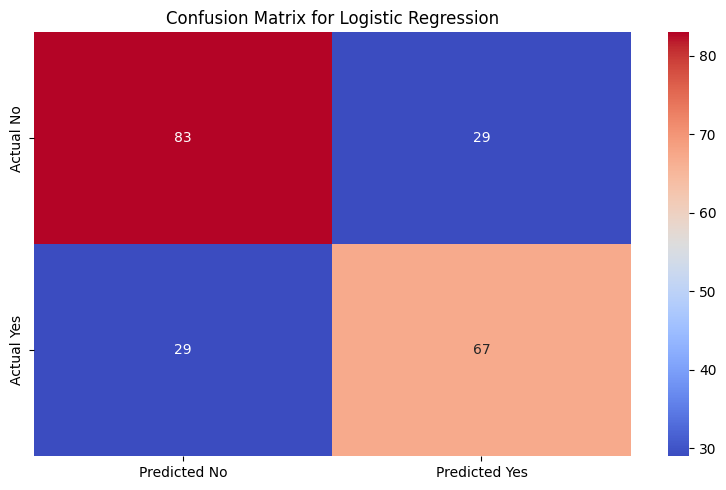

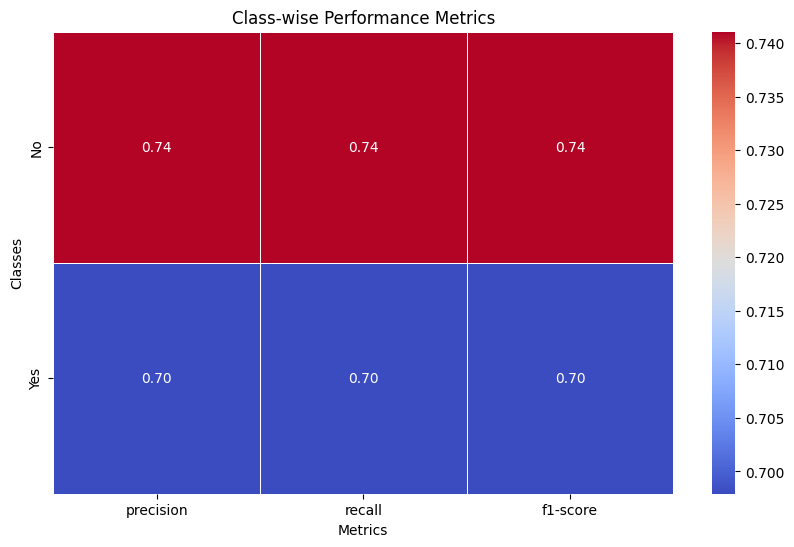

In [70]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# 7. Visualize the output
# 7.1 classification report
LR_classification_report=classification_report(y_test, LR_y_pred)
print(LR_classification_report)

# 7.2 Confusion matrix with seaborn heatmap
LR_conf_matrix=confusion_matrix(y_test, LR_y_pred)
# Seaborn heatmap
plt.figure(figsize=(8,5))
sns.heatmap(LR_conf_matrix, annot=True, fmt="d", cmap='coolwarm', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix for Logistic Regression')
plt.tight_layout()
# plt.savefig("LR_confusion_matrix.png")

# 7.3 Visualize classification report better: Class-wise Performance Metrics
LR_classification_report_2 = classification_report(y_test, LR_y_pred, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
class_metrics = {metric: [LR_classification_report_2[class_name][metric] for class_name in ['0','1']] for metric in metrics}

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=pd.DataFrame(class_metrics, index=['No','Yes']), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Class-wise Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Classes')
# plt.savefig("LR_performance_metrics.png")
plt.show()

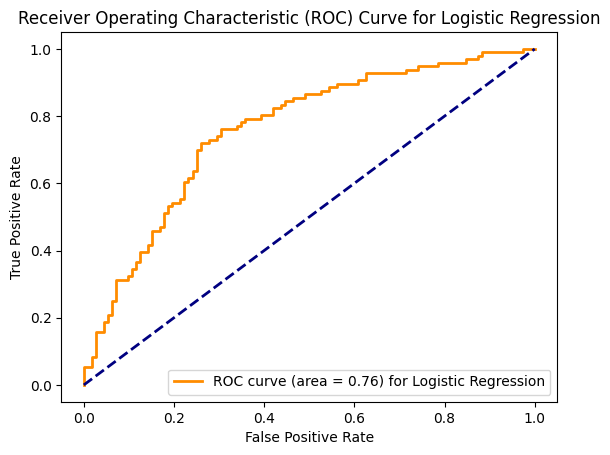

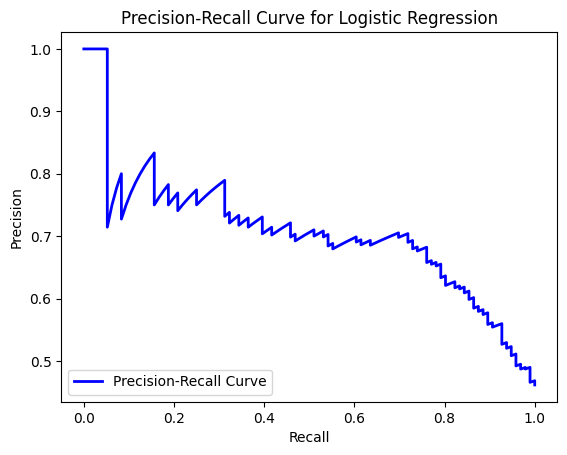

In [73]:
# More visualization
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# NOTE: only choose 1 of the following 2 methods:

# manual hyperparameter tuning
# LR_y_scores = LR_best_model.predict_proba(LR_X_test)[:, 1]

# automate hyperparameter tuning (pipeline)
LR_y_scores=LR_pipeline.predict_proba(X_test)[:, 1]


# 7.4 ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, LR_y_scores)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f) for Logistic Regression' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
# plt.savefig("LR_roc_curve.png")

# 7.5 Precision-Recall Curve (Keep it for now, can be deleted)
precision, recall, thresholds = precision_recall_curve(y_test, LR_y_scores)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend(loc="lower left")
# plt.savefig("LR_precision_recall_curve.png")
plt.show()

# LR (PROTOTYPE)

In [26]:
# # data splitting + test (15s)
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score


# # Initialize and train the model with L1 regularization (Lasso)
# prototype_LR = LogisticRegression()  # C is the inverse of regularization strength
# prototype_LR.fit(X_train, y_train)

# # Predict on the test set
# prototype_y_pred_l1 = prototype_LR.predict(X_test)

# # Evaluate the model
# prototype_accuracy_LR = accuracy_score(y_test, prototype_y_pred_l1)
# # print("Accuracy with L1 regularization:", accuracy_l1)
# print("Training (Pre-tuned) Accuracy with LR: {}".format(prototype_accuracy_LR))

In [62]:
# # 16 mins
# from sklearn.pipeline import Pipeline
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.feature_selection import SelectFromModel
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

# # Define Pipeline
# prototype_LR_pipeline = Pipeline([
#     # Variable Selection and Hyperparameter Tuning
#     ('feature_selection', SelectFromModel(LogisticRegression())),
#     ('classifier', LogisticRegression())
# ])

# # Define param grid for pipeline only
# prototype_LR_pipeline_param_grid = {
#     'classifier__penalty':['l1','l2'], # regularization
#     'classifier__C': [ 0.01,  0.1,  1],
#     'classifier__tol': [1e-3, 1e-2, 0.1],
#     'classifier__max_iter': [500, 1000, 5000]
# }

# # Perform Grid Search CV
# prototype_LR_grid_search = GridSearchCV(prototype_LR_pipeline, prototype_LR_pipeline_param_grid, cv=5)
# prototype_LR_grid_search.fit(X_val, y_val)

# # Retrieve the best estimator after grid search CV is fitted
# prototype_best_LR_estimator = prototype_LR_grid_search.best_estimator_

# # Access the coefficients of the Logistic Regression model
# prototype_lr_coefficients = prototype_best_LR_estimator.named_steps['classifier'].coef_[0]

# # Identify the features with the highest absolute coefficients
# prototype_top_indices = prototype_lr_coefficients.argsort()[-10:][::-1]  # Get indices of top 10 features
# prototype_top_features = [X_val.columns[i] for i in prototype_top_indices]  # Get feature names from indices

# # Extract the names of the top 10 features
# print("Top 10 Most Important Features:")
# for feature in prototype_top_features:
#     print(feature)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Top 10 Most Important Features:
energy
danceability
liveness
speechiness
bandokay
agnes
29
amake
arrestin
barrie


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
# # 32 second
# # 4.5 obtain the best parameter from the pipeline
# prototype_LR_best_params = prototype_LR_grid_search.best_params_
# print(prototype_LR_best_params)

# # 5. Refit the model with the best parameters
# prototype_LR_pipeline.set_params(**prototype_LR_best_params)
# prototype_LR_pipeline.fit(X_train, y_train)

# # 6. Make predictions of the actual model and obtain accuracy
# prototype_LR_y_pred = LR_pipeline.predict(X_test)

# # 6.1 Calculate accuracy: around
# prototype_LR_pipeline_accuracy = prototype_LR_pipeline.score(X_test, y_test)
# print("Testing (Post-tuned) Accuracy from automated tuning on LR: {}".format(prototype_LR_pipeline_accuracy))

{'classifier__C': 1, 'classifier__max_iter': 1000, 'classifier__penalty': 'l2', 'classifier__tol': 0.001}


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Testing (Post-tuned) Accuracy from automated tuning on LR: 0.7067307692307693


In [64]:
# print("For Logistic regression (TESTING):")

# print("\nBefore hyperparameter tuning:")
# print("Training (Pre-tuned) Accuracy with LR: {}".format(prototype_accuracy_LR))
# print("\nAfter hyperparameter tuning:")
# print("Testing (Post-tuned) Accuracy from automated tuning on LR: {}".format(prototype_LR_pipeline_accuracy))
# print("---------------------------------------")
# print("Training Accuracy: \t{0}% \t({1})".format(prototype_LR_pipeline.score(X_train, y_train)*100, prototype_LR_pipeline.score(X_train, y_train)))
# print("Test Accuracy: \t\t{0}% \t({1})".format(prototype_LR_pipeline.score(X_test, y_test)*100, prototype_LR_pipeline.score(X_test, y_test)))

For Logistic regression (TESTING):

Before hyperparameter tuning:
Training (Pre-tuned) Accuracy with LR: 0.6826923076923077

After hyperparameter tuning:
Testing (Post-tuned) Accuracy from automated tuning on LR: 0.7067307692307693
---------------------------------------
Training Accuracy: 	84.2548076923077% 	(0.8425480769230769)
Test Accuracy: 		70.67307692307693% 	(0.7067307692307693)


# MODEL 2: XGBoost

In [27]:
# XGBoost original

# (1.5 mins)

# data splitting + test
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

XGB = XGBClassifier(random_state=42)
XGB.fit(X_train, y_train)

# Predict on the test set
XGB_pred = XGB.predict(X_test)

# Evaluate the model
accuracy_XGB = accuracy_score(y_test, XGB_pred)
print("Training (Pre-tuned) Accuracy with XGB: {}".format(accuracy_XGB))


Training (Pre-tuned) Accuracy with XGB: 0.6634615384615384


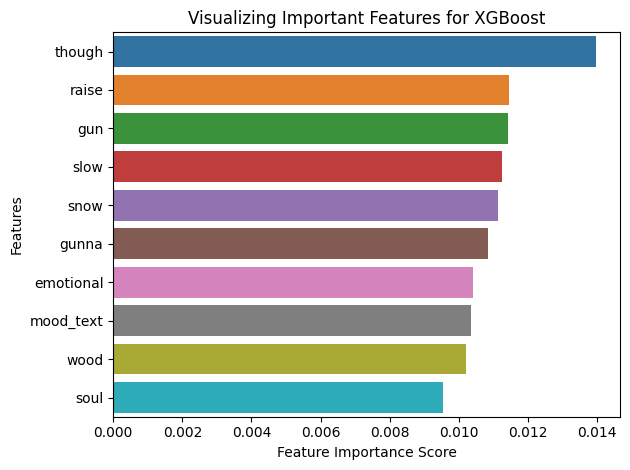

In [28]:
# Make predictions on y using training data's x
# xgb_train_pred = xgb.predict(X_test)

# Measure the importance of each features to further improve the model
XGB_feature_imp = pd.Series(XGB.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot the features' importance using a barplot
sns.barplot(x=XGB_feature_imp.head(10), y=XGB_feature_imp.head(10).index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for XGBoost")
plt.tight_layout()

# plt.savefig("XGBoost_feature_importance.png")
plt.show()

In [30]:
# XGB tuning (18 mins)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define XGB pipeline
XGB_pipeline = Pipeline([
    ('feature_selection', SelectFromModel(XGBClassifier(random_state=42))),
    ('classifier', XGBClassifier(random_state=42))
])

# Define param distribution for Randomized Search
XGB_pipeline_param_dist = {
    'feature_selection__estimator__max_depth': [1, 3],
    'classifier__learning_rate': uniform(0, 1),  # Continuous distribution
    'classifier__gamma': uniform(0, 0.1),        # Continuous distribution
    'classifier__min_child_weight': [1, 5, 10]
}

# Initialize Randomized Search CV
XGB_random_search = RandomizedSearchCV(
    estimator=XGB_pipeline,
    param_distributions=XGB_pipeline_param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,       # 5-fold cross-validation
    random_state=42,
    n_jobs=-1
)

# Fit the model with randomized search
XGB_random_search.fit(X_val, y_val)

# Get the best parameters
best_params = XGB_random_search.best_params_
print("Best parameters found by Randomized Search CV:")
print(best_params)


Best parameters found by Randomized Search CV:
{'classifier__gamma': 0.005641157902710026, 'classifier__learning_rate': 0.7219987722668247, 'classifier__min_child_weight': 5, 'feature_selection__estimator__max_depth': 3}


In [31]:
# Fit the model with grid search

import joblib

# Save the trained model
joblib.dump(XGB_random_search.best_estimator_, 'xgboost_model.pkl')
joblib.dump(XGB_random_search.best_params_, 'xgboost_best_params.joblib')

# Load the saved model
#loaded_model = joblib.load('xgboost_model.pkl')
#loaded_best_params = joblib.load('xgboost_best_params.joblib')



['xgboost_best_params.joblib']

In [32]:
# time taken (<2 mins)
# Display the best hyperparameter combination from Grid Search
XGB_best_params = XGB_random_search.best_params_
print("The best hyperparameter combination is: ", XGB_best_params)

# Refit the XGBoost classifier with the best hyperparameters
XGB_pipeline.set_params(**XGB_best_params)
XGB_pipeline.fit(X_train, y_train.reshape(len(y_train),))

# Make predictions using the XGBoost classifier
XGB_y_pred = XGB_pipeline.predict(X_test)

# Calculate the accuracy
XGB_pipeline_accuracy = XGB_pipeline.score(X_test, y_test)
print("Tuned Accuracy using Pipeline (XGBoost): {}".format(XGB_pipeline_accuracy))

The best hyperparameter combination is:  {'classifier__gamma': 0.005641157902710026, 'classifier__learning_rate': 0.7219987722668247, 'classifier__min_child_weight': 5, 'feature_selection__estimator__max_depth': 3}
Tuned Accuracy using Pipeline (XGBoost): 0.6634615384615384


In [66]:
# Accueracy comparsion
print("For XGBoost (Model 2):")

accuracy_XGB_pre_tuning = accuracy_score(y_test, XGB_pred)

print("Training Accuracy (pre-tuned): \t\t\t\t{0}% \t({1})".format(accuracy_XGB_pre_tuning*100, accuracy_XGB_pre_tuning))
print("----------------------------------------------------------------------------")
print("Training Accuracy (post-tuned): \t{0}% \t({1})".format(XGB_pipeline.score(X_train, y_train)*100, XGB_pipeline.score(X_train, y_train)))
# print("Training Accuracy: \t{0}% \t({1})".format(XGB_pipeline.score(X_train, y_train)*100, XGB_pipeline.score(X_train, y_train)))
print("Testing Accuracy: \t{0}% \t({1})".format(XGB_pipeline.score(X_test, y_test)*100, XGB_pipeline.score(X_test, y_test)))

For XGBoost (Model 2):
Training Accuracy (pre-tuned): 				66.34615384615384% 	(0.6634615384615384)
----------------------------------------------------------------------------
Training Accuracy (post-tuned): 	100.0% 	(1.0)
Testing Accuracy: 	66.34615384615384% 	(0.6634615384615384)


              precision    recall  f1-score   support

           0       0.70      0.65      0.68       112
           1       0.62      0.68      0.65        96

    accuracy                           0.66       208
   macro avg       0.66      0.66      0.66       208
weighted avg       0.67      0.66      0.66       208



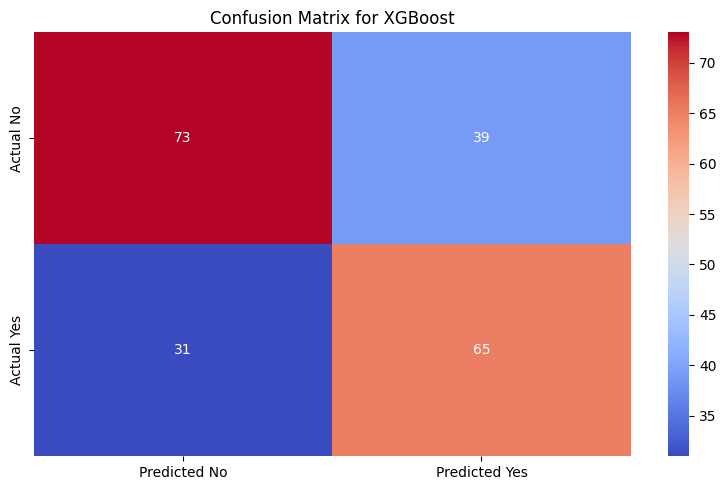

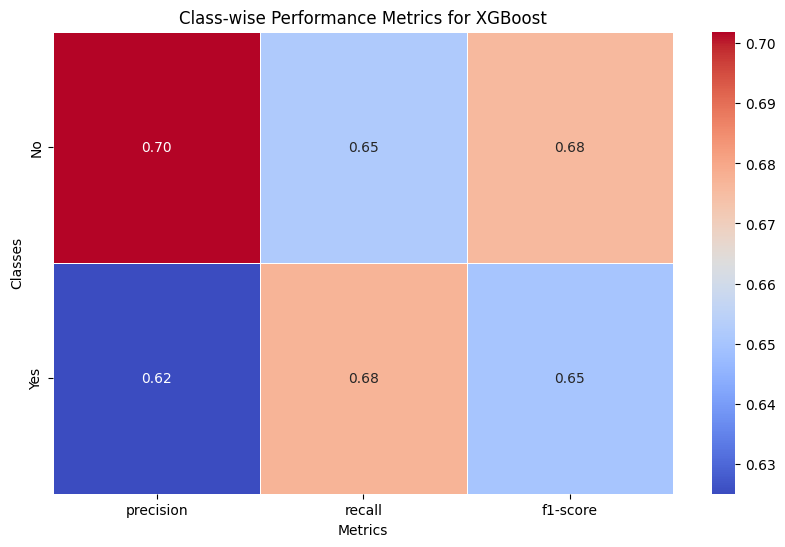

In [69]:
# Classification report
XGB_classification_report = classification_report(y_test, XGB_y_pred)
print(XGB_classification_report)

# Confusion matrix with seaborn heatmap
XGB_conf_matrix = confusion_matrix(y_test, XGB_y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(XGB_conf_matrix, annot=True, fmt="d", cmap='coolwarm', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix for XGBoost')
plt.tight_layout()
# plt.savefig("XGBoost_confusion_matrix.png")

# Class-wise Performance Metrics
XGB_classification_report_2 = classification_report(y_test, XGB_y_pred, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
class_metrics = {metric: [XGB_classification_report_2[class_name][metric] for class_name in ['0','1']] for metric in metrics}
plt.figure(figsize=(10, 6))
sns.heatmap(data=pd.DataFrame(class_metrics, index=['No','Yes']), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Class-wise Performance Metrics for XGBoost')
plt.xlabel('Metrics')
plt.ylabel('Classes')
# plt.savefig("XGBoost_performance_metrics.png")
plt.show()

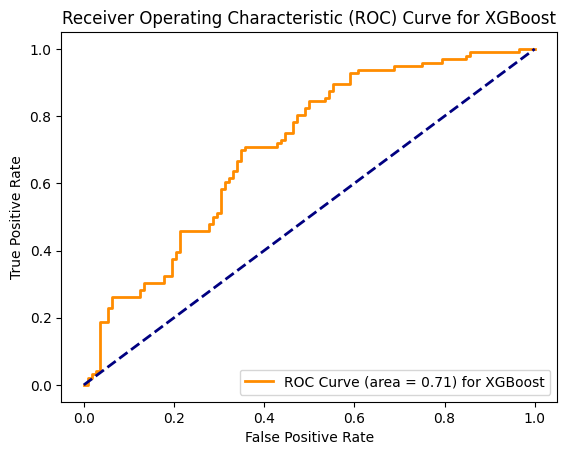

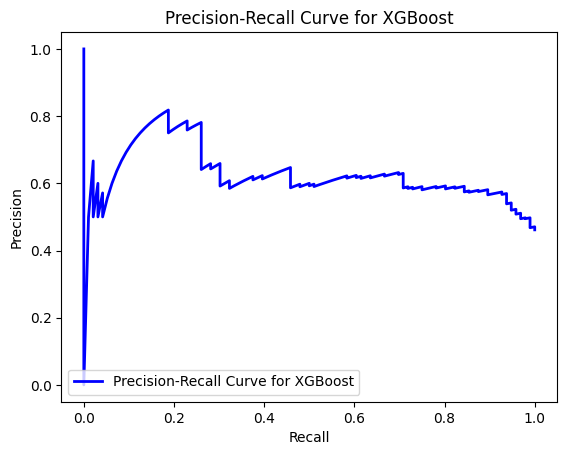

In [35]:
xgb_y_scores = XGB_pipeline.predict_proba(X_test)[:, 1]

# ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_y_scores)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC Curve (area = %0.2f) for XGBoost' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.legend(loc="lower right")
# plt.savefig("XGBoost_roc_curve.png")

# Precision-Recall Curve
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_test, xgb_y_scores)
plt.figure()
plt.plot(recall_xgb, precision_xgb, color='blue', lw=2, label='Precision-Recall Curve for XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XGBoost')
plt.legend(loc="lower left")
# plt.savefig("XGBoost_precision_recall_curve.png")
plt.show()

# MODEL 3: NB

In [36]:
# NB
# (<2 mins)

# data splitting + test
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

NB = XGBClassifier(random_state=42)
NB.fit(X_train, y_train)

# Predict on the test set
NB_pred = NB.predict(X_test)

# Evaluate the model
accuracy_NB = accuracy_score(y_test, NB_pred)
print("Training (Pre-tuned) Accuracy with NB: {}".format(accuracy_NB))

Training (Pre-tuned) Accuracy with NB: 0.6634615384615384


In [38]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define Naive Bayes pipeline
NB_pipeline = Pipeline([
    ('classifier', GaussianNB())
])

# Define parameter distribution for Randomized Search
param_dist = {
    'classifier__var_smoothing': uniform(1e-9, 0.1)  # Continuous distribution for var_smoothing
}

# Initialize Randomized Search CV
NB_random_search = RandomizedSearchCV(
    estimator=NB_pipeline,
    param_distributions=param_dist,
    n_iter=10,      # Number of parameter settings that are sampled
    cv=5,           # 5-fold cross-validation
    random_state=42,
    n_jobs=-1
)

# Fit the model with randomized search
NB_random_search.fit(X_val, y_val)

# Get the best estimator (model)
best_NB_model = NB_random_search.best_estimator_

# Get the best score
best_score = NB_random_search.best_score_

print("Best score found by Randomized Search CV:", best_score)
print("Best Naive Bayes model:", best_NB_model)


Best score found by Randomized Search CV: 0.5003484320557491
Best Naive Bayes model: Pipeline(steps=[('classifier', GaussianNB(var_smoothing=0.015601865044243652))])


In [39]:
# Fit the model with grid search

import joblib

# Save the trained model
joblib.dump(NB_random_search.best_estimator_, 'naive_bayes_model.pkl')
joblib.dump(NB_random_search.best_params_, 'naive_bayes_best_params.joblib')

# Load the saved model
#loaded_model = joblib.load('naive_bayes_model.pkl')
#loaded_best_params = joblib.load('naive_bayes_best_params.joblib')

['naive_bayes_best_params.joblib']

In [40]:
# time taken (<2 mins)
# Display the best hyperparameter combination from Grid Search
NB_best_params = NB_random_search.best_params_
print("The best hyperparameter combination is: ", NB_best_params)

# Refit the XGBoost classifier with the best hyperparameters
NB_pipeline.set_params(**NB_best_params)
NB_pipeline.fit(X_train, y_train.reshape(len(y_train),))

# Make predictions using the XGBoost classifier
NB_y_pred = NB_pipeline.predict(X_test)

# Calculate the accuracy
NB_pipeline_accuracy = NB_pipeline.score(X_test, y_test)
print("Tuned Accuracy using Pipeline (Naive Bayes): {}".format(NB_pipeline_accuracy))

The best hyperparameter combination is:  {'classifier__var_smoothing': 0.015601865044243652}
Tuned Accuracy using Pipeline (Naive Bayes): 0.6009615384615384


In [67]:
# Accueracy comparsion
print("For Naive Bayes (Model 3):")

accuracy_NB_pre_tuning = accuracy_score(y_test, NB_pred)

print("Training (pre-tuned) Accuracy: \t\t\t\t{0}% \t({1})".format(accuracy_NB_pre_tuning*100, accuracy_NB_pre_tuning))
print("Training (post-tuned) Accuracy: \t\t\t{0}% \t({1})".format(NB_pipeline.score(X_train, y_train)*100, NB_pipeline.score(X_train, y_train)))
print("----------------------------------------------------------------------------")
print("Testing Accuracy: \t\t\t\t\t{0}% \t({1})".format(NB_pipeline.score(X_test, y_test)*100, NB_pipeline.score(X_test, y_test)))

For Naive Bayes (Model 3):
Training (pre-tuned) Accuracy: 				66.34615384615384% 	(0.6634615384615384)
Training (post-tuned) Accuracy: 			55.46875% 	(0.5546875)
----------------------------------------------------------------------------
Testing Accuracy: 					60.09615384615385% 	(0.6009615384615384)


              precision    recall  f1-score   support

           0       0.65      0.56      0.60       112
           1       0.56      0.65      0.60        96

    accuracy                           0.60       208
   macro avg       0.60      0.60      0.60       208
weighted avg       0.61      0.60      0.60       208



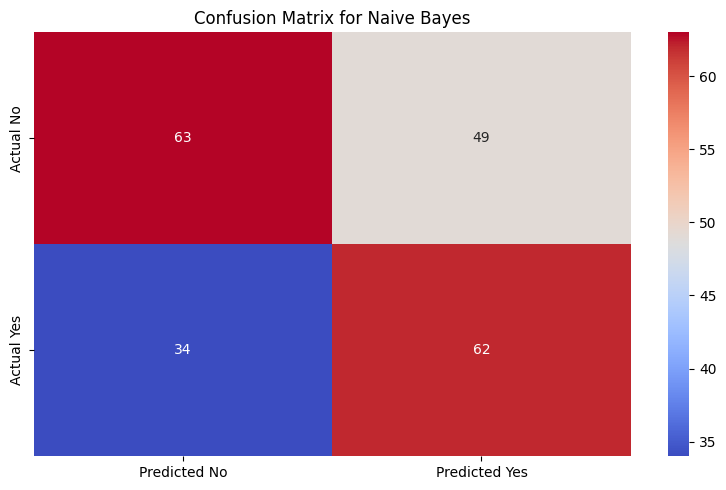

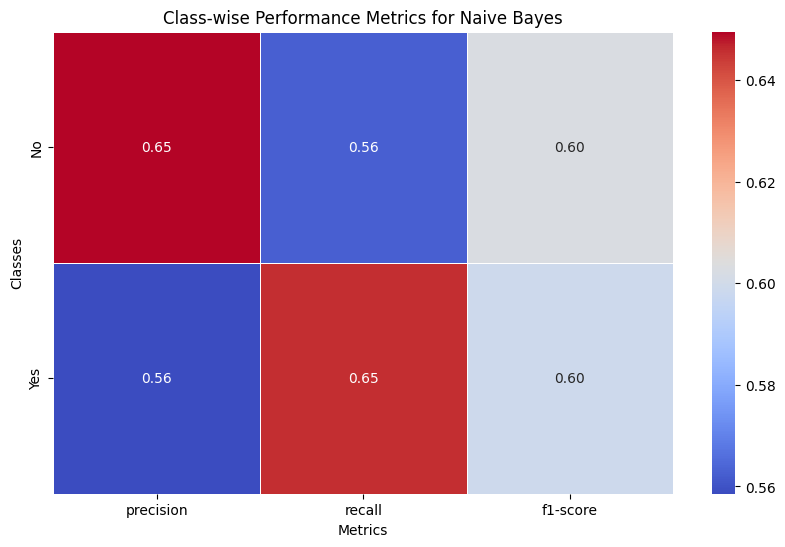

In [68]:
# Classification report
NB_classification_report = classification_report(y_test, NB_y_pred)
print(NB_classification_report)

# Confusion matrix with seaborn heatmap
NB_conf_matrix = confusion_matrix(y_test, NB_y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(NB_conf_matrix, annot=True, fmt="d", cmap='coolwarm', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix for Naive Bayes')
plt.tight_layout()
# plt.savefig("naive_bayes_confusion_matrix.png")

# Class-wise Performance Metrics
NB_classification_report_2 = classification_report(y_test, NB_y_pred, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
class_metrics = {metric: [NB_classification_report_2[class_name][metric] for class_name in ['0','1']] for metric in metrics}
plt.figure(figsize=(10, 6))
sns.heatmap(data=pd.DataFrame(class_metrics, index=['No','Yes']), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Class-wise Performance Metrics for Naive Bayes')
plt.xlabel('Metrics')
plt.ylabel('Classes')
# plt.savefig("naive_bayes_performance_metrics.png")
plt.show()

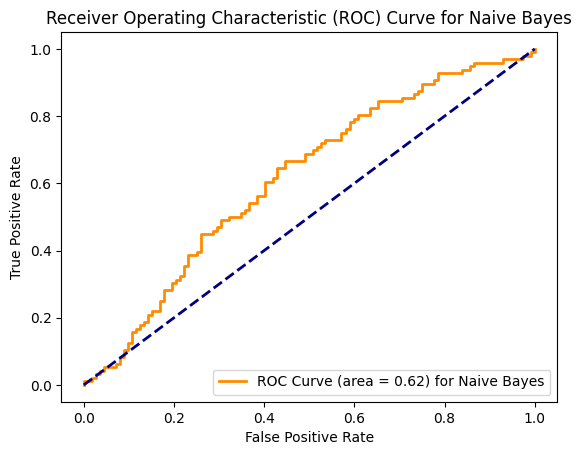

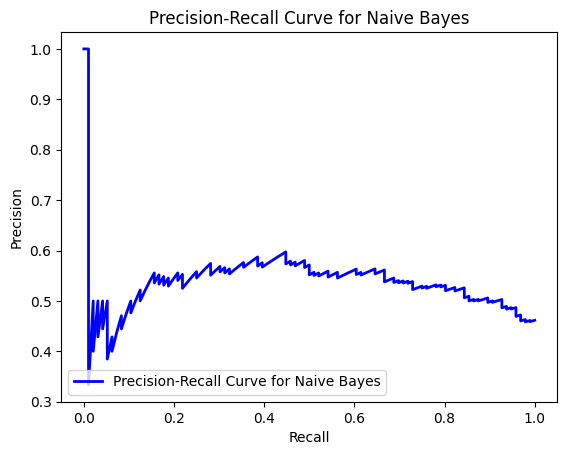

In [74]:
NB_y_scores = NB_pipeline.predict_proba(X_test)[:, 1]

# ROC Curve
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, NB_y_scores)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure()
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='ROC Curve (area = %0.2f) for Naive Bayes' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend(loc="lower right")
# plt.savefig("naive_bayes_roc_curve.png")

# Precision-Recall Curve
precision_nb, recall_nb, thresholds_nb = precision_recall_curve(y_test, NB_y_scores)
plt.figure()
plt.plot(recall_nb, precision_nb, color='blue', lw=2, label='Precision-Recall Curve for Naive Bayes')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Naive Bayes')
plt.legend(loc="lower left")
# plt.savefig("naive_bayes_precision_recall_curve.png")
plt.show()

# MODEL 4: SVM

In [82]:
# SVM
# (<1 mins)

# fitting and training
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SVM = SVC(random_state=42)
SVM.fit(X_train, y_train)

# Predict on the test set
SVM_pred = SVM.predict(X_test)

# Evaluate the model
accuracy_SVM = accuracy_score(y_test, SVM_pred)
print("Training (Pre-tuned) Accuracy with Support Vector Machine: {}".format(accuracy_SVM))

Training (Pre-tuned) Accuracy with Support Vector Machine: 0.5384615384615384


In [84]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define SVM pipeline
SVM_pipeline = Pipeline([
    ('classifier', SVC())
])

# Define parameter distribution for Randomized Search
param_dist = {
    'classifier__C': uniform(0.1, 10),            # Continuous distribution for C
    'classifier__gamma': ['scale', 'auto'],       # Kernel coefficient for 'rbf', 'poly', 'sigmoid'
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'classifier__degree': randint(1, 10),         # Degree of the polynomial kernel function
    'classifier__coef0': uniform(0.0, 1.0),       # Independent term in kernel function (poly, sigmoid)
    'classifier__shrinking': [True, False],       # Whether to use the shrinking heuristic
    'classifier__probability': [True],     # Whether to enable probability estimates
    'classifier__decision_function_shape': ['ovo', 'ovr'],  # Whether to use one-vs-one or one-vs-rest for multi-class classification
    'classifier__tol': uniform(1e-5, 1e-2),       # Tolerance for stopping criterion
    'classifier__class_weight': [None, 'balanced'],  # Weights associated with classes in the form {class_label: weight}
    'classifier__max_iter': [-1, 500, 1000, 5000]  # Maximum number of iterations
}

# Initialize Randomized Search CV
SVM_random_search = RandomizedSearchCV(
    estimator=SVM_pipeline,
    param_distributions=param_dist,
    n_iter=10,      # Number of parameter settings that are sampled
    cv=5,           # 5-fold cross-validation
    random_state=42,
    n_jobs=-1
)

# Fit the model with randomized search
SVM_random_search.fit(X_val, y_val)

# Get the best estimator (model)
best_SVM_model = SVM_random_search.best_estimator_

# Get the best score
best_score = SVM_random_search.best_score_

print("Best score found by Randomized Search CV:", best_score)
print("Best SVM model:", best_SVM_model)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

Best score found by Randomized Search CV: 0.5535423925667828
Best SVM model: Pipeline(steps=[('classifier',
                 SVC(C=4.010606075732408, class_weight='balanced',
                     coef0=0.662522284353982, degree=6, gamma='auto',
                     kernel='poly', max_iter=5000, probability=True,
                     shrinking=False, tol=0.00032313292455558585))])


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [85]:
# Fit the model with grid search

import joblib

# Save the trained model
joblib.dump(SVM_random_search.best_estimator_, 'SVM_model.pkl')
joblib.dump(SVM_random_search.best_params_, 'SVM_best_params.joblib')

# Load the saved model
#loaded_model = joblib.load('naive_bayes_model.pkl')
#loaded_best_params = joblib.load('naive_bayes_best_params.joblib')

['SVM_best_params.joblib']

In [86]:
# time taken (<2 mins)
# Display the best hyperparameter combination from Grid Search
SVM_best_params = SVM_random_search.best_params_
print("The best hyperparameter combination is: ", SVM_best_params)

# Refit the XGBoost classifier with the best hyperparameters
SVM_pipeline.set_params(**SVM_best_params)
SVM_pipeline.fit(X_train, y_train.reshape(len(y_train),))

# Make predictions using the XGBoost classifier
SVM_y_pred = SVM_pipeline.predict(X_test)

# Calculate the accuracy
SVM_pipeline_accuracy = SVM_pipeline.score(X_test, y_test)
print("Tuned Accuracy using Pipeline (Naive Bayes): {}".format(SVM_pipeline_accuracy))

The best hyperparameter combination is:  {'classifier__C': 4.010606075732408, 'classifier__class_weight': 'balanced', 'classifier__coef0': 0.662522284353982, 'classifier__decision_function_shape': 'ovr', 'classifier__degree': 6, 'classifier__gamma': 'auto', 'classifier__kernel': 'poly', 'classifier__max_iter': 5000, 'classifier__probability': True, 'classifier__shrinking': False, 'classifier__tol': 0.00032313292455558585}


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Tuned Accuracy using Pipeline (Naive Bayes): 0.5625


In [87]:
# Accueracy comparsion
print("For Support Vector Machine (Model 4):")

accuracy_SVM_pre_tuning = accuracy_score(y_test, SVM_pred)

print("Training (pre-tuned) Accuracy: \t\t\t\t{0}% \t({1})".format(accuracy_SVM_pre_tuning*100, accuracy_SVM_pre_tuning))
print("Training (post-tuned) Accuracy: \t\t\t{0}% \t({1})".format(SVM_pipeline.score(X_train, y_train)*100, SVM_pipeline.score(X_train, y_train)))
print("----------------------------------------------------------------------------")
print("Testing Accuracy: \t\t\t\t\t{0}% \t({1})".format(SVM_pipeline.score(X_test, y_test)*100, SVM_pipeline.score(X_test, y_test)))

For Support Vector Machine (Model 4):
Training (pre-tuned) Accuracy: 				53.84615384615385% 	(0.5384615384615384)
Training (post-tuned) Accuracy: 			62.86057692307693% 	(0.6286057692307693)
----------------------------------------------------------------------------
Testing Accuracy: 					56.25% 	(0.5625)


              precision    recall  f1-score   support

           0       0.58      0.71      0.63       112
           1       0.54      0.40      0.46        96

    accuracy                           0.56       208
   macro avg       0.56      0.55      0.54       208
weighted avg       0.56      0.56      0.55       208



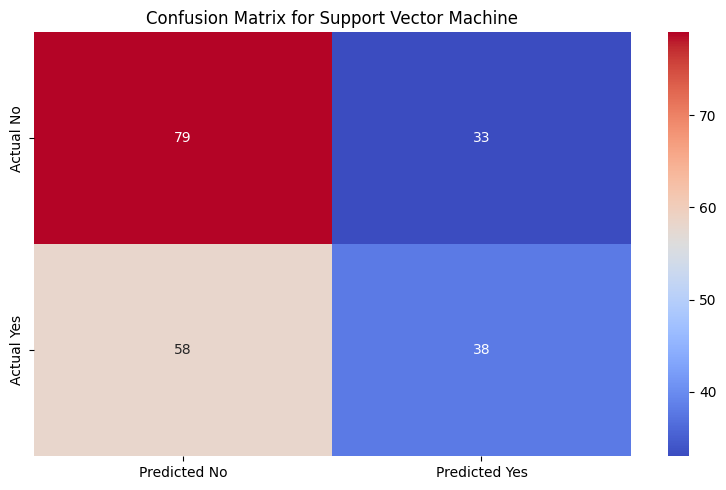

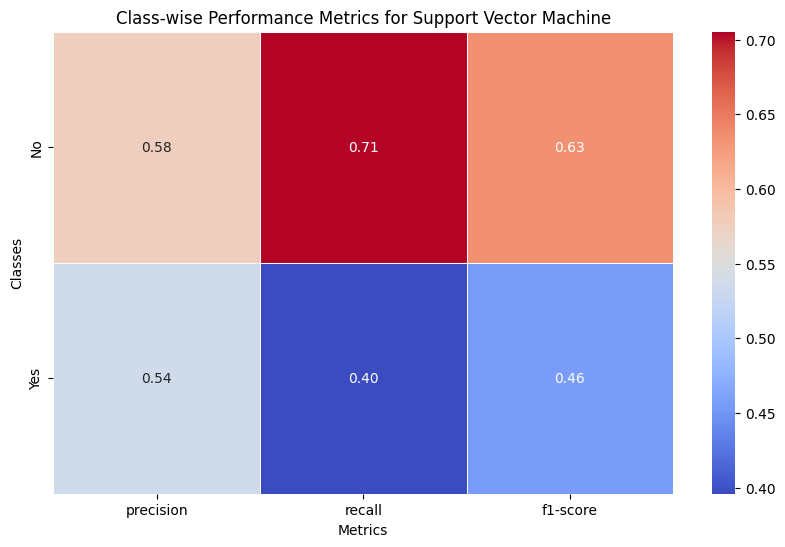

In [88]:
# Classification report
SVM_classification_report = classification_report(y_test, SVM_y_pred)
print(SVM_classification_report)

# Confusion matrix with seaborn heatmap
SVM_conf_matrix = confusion_matrix(y_test, SVM_y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(SVM_conf_matrix, annot=True, fmt="d", cmap='coolwarm', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix for Support Vector Machine')
plt.tight_layout()
# plt.savefig("SVM_confusion_matrix.png")

# Class-wise Performance Metrics
SVM_classification_report_2 = classification_report(y_test, SVM_y_pred, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
class_metrics = {metric: [SVM_classification_report_2[class_name][metric] for class_name in ['0','1']] for metric in metrics}
plt.figure(figsize=(10, 6))
sns.heatmap(data=pd.DataFrame(class_metrics, index=['No','Yes']), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Class-wise Performance Metrics for Support Vector Machine')
plt.xlabel('Metrics')
plt.ylabel('Classes')
# plt.savefig("SVM_performance_metrics.png")
plt.show()

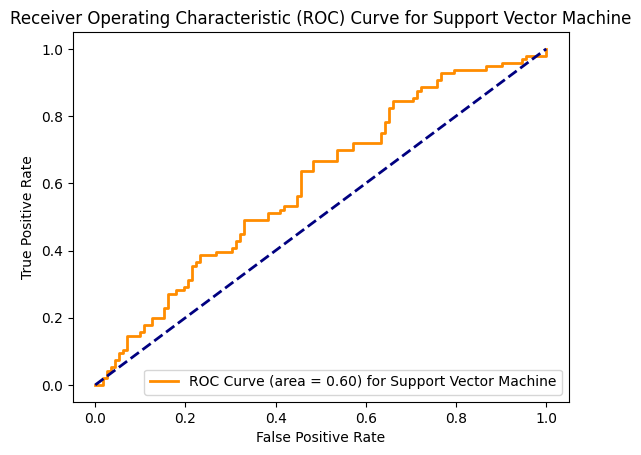

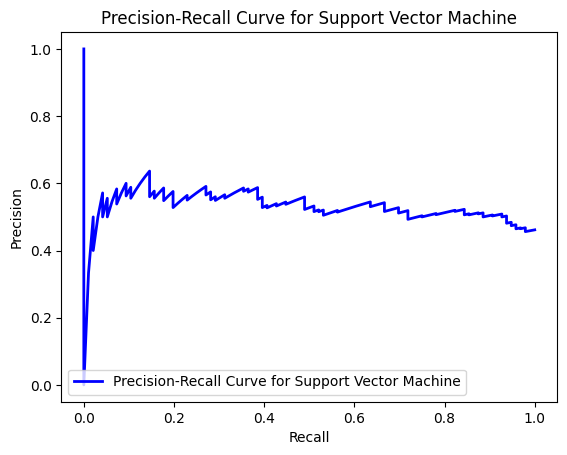

In [89]:
SVM_y_scores = SVM_pipeline.predict_proba(X_test)[:, 1]

# ROC Curve
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_test, SVM_y_scores)
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)

plt.figure()
plt.plot(fpr_SVM, tpr_SVM, color='darkorange', lw=2, label='ROC Curve (area = %0.2f) for Support Vector Machine' % roc_auc_SVM)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Support Vector Machine')
plt.legend(loc="lower right")
# plt.savefig("SVM_roc_curve.png")

# Precision-Recall Curve
precision_SVM, recall_SVM, thresholds_SVM = precision_recall_curve(y_test, SVM_y_scores)
plt.figure()
plt.plot(recall_SVM, precision_SVM, color='blue', lw=2, label='Precision-Recall Curve for Support Vector Machine')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Support Vector Machine')
plt.legend(loc="lower left")
# plt.savefig("SVM_precision_recall_curve.png")
plt.show()

# Model 5: RF

In [90]:
# RF
# (<1 mins)

# fitting and training
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)

# Predict on the test set
RF_pred = RF.predict(X_test)

# Evaluate the model
accuracy_RF = accuracy_score(y_test, RF_pred)
print("Training (Pre-tuned) Accuracy with Support Vector Machine: {}".format(accuracy_RF))

Training (Pre-tuned) Accuracy with Support Vector Machine: 0.5865384615384616


In [91]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define RF pipeline
RF_pipeline = Pipeline([
    ('classifier', RandomForestClassifier())
])

# Define parameter distribution for Randomized Search
param_dist = {
    'classifier__n_estimators': randint(10, 1000),  # Number of trees in the forest
    'classifier__max_depth': [None] + list(randint(3, 20).rvs(5)),  # Maximum depth of the tree
    'classifier__min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': randint(1, 20),   # Minimum number of samples required to be at a leaf node
    'classifier__max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'classifier__bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
    'classifier__criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'classifier__class_weight': [None, 'balanced', 'balanced_subsample'],  # Weights associated with classes
    'classifier__max_samples': uniform(0.1, 0.9),  # Fraction of samples used for fitting the individual base learners
    'classifier__random_state': [42],  # Random state for reproducibility
}

# Initialize Randomized Search CV
RF_random_search = RandomizedSearchCV(
    estimator=RF_pipeline,
    param_distributions=param_dist,
    n_iter=20,      # Number of parameter settings that are sampled
    cv=5,           # 5-fold cross-validation
    random_state=42,
    n_jobs=-1
)

# Fit the model with randomized search
RF_random_search.fit(X_val, y_val)

# Get the best estimator (model)
best_RF_model = RF_random_search.best_estimator_

# Get the best score
best_score = RF_random_search.best_score_

print("Best score found by Randomized Search CV:", best_score)
print("Best RF model:", best_RF_model)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past beha

Best score found by Randomized Search CV: 0.6102206736353077
Best RF model: Pipeline(steps=[('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=8,
                                        max_features='auto',
                                        max_samples=0.9234637079894027,
                                        min_samples_leaf=9, min_samples_split=9,
                                        n_estimators=789, random_state=42))])


In [92]:
# Fit the model with grid search

import joblib

# Save the trained model
joblib.dump(RF_random_search.best_estimator_, 'RF_model.pkl')
joblib.dump(RF_random_search.best_params_, 'RF_best_params.joblib')

# Load the saved model
#loaded_model = joblib.load('RF_model.pkl')
#loaded_best_params = joblib.load('RF_best_params.joblib')

['RF_best_params.joblib']

In [93]:
# time taken (<2 mins)
# Display the best hyperparameter combination from Grid Search
RF_best_params = RF_random_search.best_params_
print("The best hyperparameter combination is: ", RF_best_params)

# Refit the XGBoost classifier with the best hyperparameters
RF_pipeline.set_params(**RF_best_params)
RF_pipeline.fit(X_train, y_train.reshape(len(y_train),))

# Make predictions using the XGBoost classifier
RF_y_pred = RF_pipeline.predict(X_test)

# Calculate the accuracy
RF_pipeline_accuracy = RF_pipeline.score(X_test, y_test)
print("Tuned Accuracy using Pipeline (Naive Bayes): {}".format(RF_pipeline_accuracy))

The best hyperparameter combination is:  {'classifier__bootstrap': True, 'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__max_depth': 8, 'classifier__max_features': 'auto', 'classifier__max_samples': 0.9234637079894027, 'classifier__min_samples_leaf': 9, 'classifier__min_samples_split': 9, 'classifier__n_estimators': 789, 'classifier__random_state': 42}


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Tuned Accuracy using Pipeline (Naive Bayes): 0.6346153846153846


In [94]:
# Accueracy comparsion
print("For Random Forest (Model 5):")

accuracy_RF_pre_tuning = accuracy_score(y_test, RF_pred)

print("Training (pre-tuned) Accuracy: \t\t\t\t{0}% \t({1})".format(accuracy_RF_pre_tuning*100, accuracy_RF_pre_tuning))
print("Training (post-tuned) Accuracy: \t\t\t{0}% \t({1})".format(RF_pipeline.score(X_train, y_train)*100, RF_pipeline.score(X_train, y_train)))
print("----------------------------------------------------------------------------")
print("Testing Accuracy: \t\t\t\t\t{0}% \t({1})".format(RF_pipeline.score(X_test, y_test)*100, RF_pipeline.score(X_test, y_test)))

For Random Forest (Model 5):
Training (pre-tuned) Accuracy: 				58.65384615384615% 	(0.5865384615384616)
Training (post-tuned) Accuracy: 			82.6923076923077% 	(0.8269230769230769)
----------------------------------------------------------------------------
Testing Accuracy: 					63.46153846153846% 	(0.6346153846153846)


              precision    recall  f1-score   support

           0       0.68      0.61      0.64       112
           1       0.59      0.67      0.63        96

    accuracy                           0.63       208
   macro avg       0.64      0.64      0.63       208
weighted avg       0.64      0.63      0.64       208



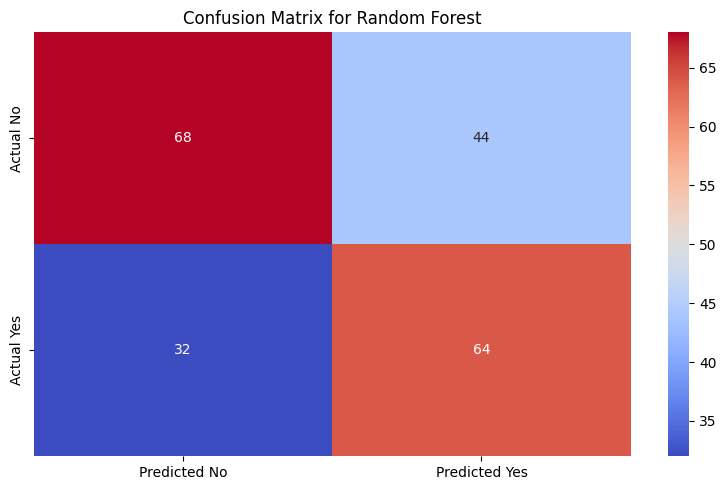

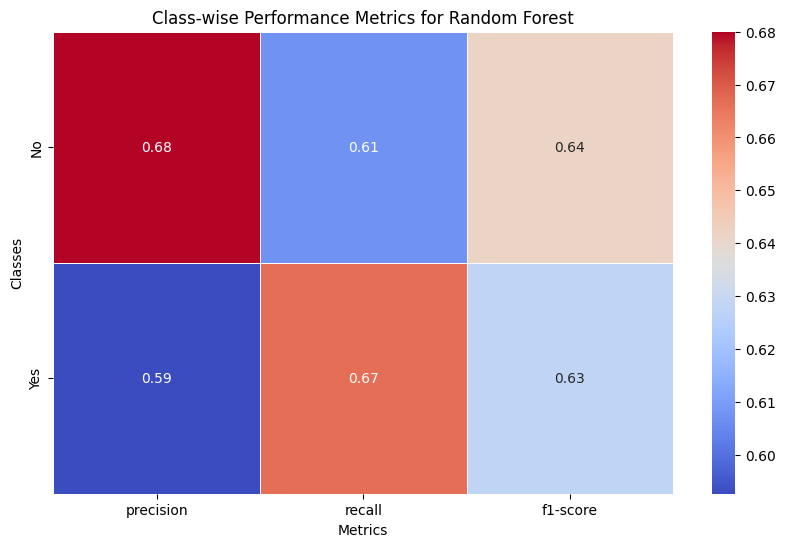

In [95]:
# Classification report
RF_classification_report = classification_report(y_test, RF_y_pred)
print(RF_classification_report)

# Confusion matrix with seaborn heatmap
RF_conf_matrix = confusion_matrix(y_test, RF_y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(RF_conf_matrix, annot=True, fmt="d", cmap='coolwarm', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix for Random Forest')
plt.tight_layout()
# plt.savefig("RF_confusion_matrix.png")

# Class-wise Performance Metrics
RF_classification_report_2 = classification_report(y_test, RF_y_pred, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
class_metrics = {metric: [RF_classification_report_2[class_name][metric] for class_name in ['0','1']] for metric in metrics}
plt.figure(figsize=(10, 6))
sns.heatmap(data=pd.DataFrame(class_metrics, index=['No','Yes']), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Class-wise Performance Metrics for Random Forest')
plt.xlabel('Metrics')
plt.ylabel('Classes')
# plt.savefig("RF_performance_metrics.png")
plt.show()

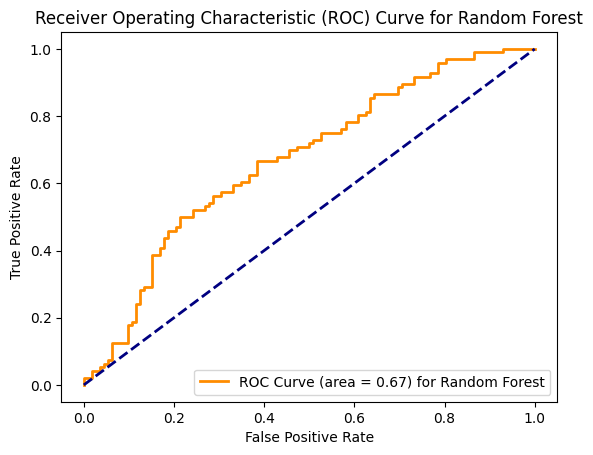

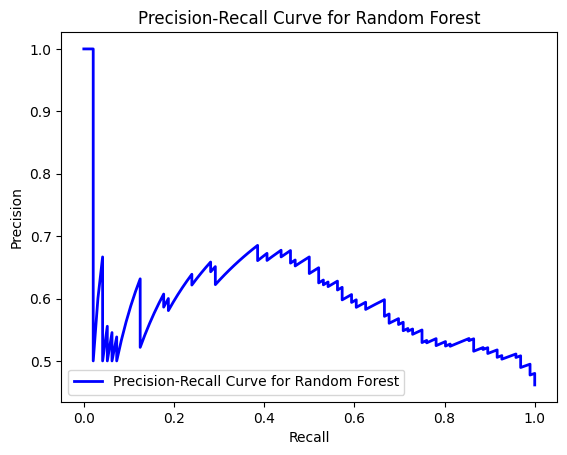

In [96]:
RF_y_scores = RF_pipeline.predict_proba(X_test)[:, 1]

# ROC Curve
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, RF_y_scores)
roc_auc_RF = auc(fpr_RF, tpr_RF)

plt.figure()
plt.plot(fpr_RF, tpr_RF, color='darkorange', lw=2, label='ROC Curve (area = %0.2f) for Random Forest' % roc_auc_RF)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
# plt.savefig("RF_roc_curve.png")

# Precision-Recall Curve
precision_RF, recall_RF, thresholds_RF = precision_recall_curve(y_test, RF_y_scores)
plt.figure()
plt.plot(recall_RF, precision_RF, color='blue', lw=2, label='Precision-Recall Curve for Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend(loc="lower left")
# plt.savefig("RF_precision_recall_curve.png")
plt.show()

# SPLIT FOR COMPARISON

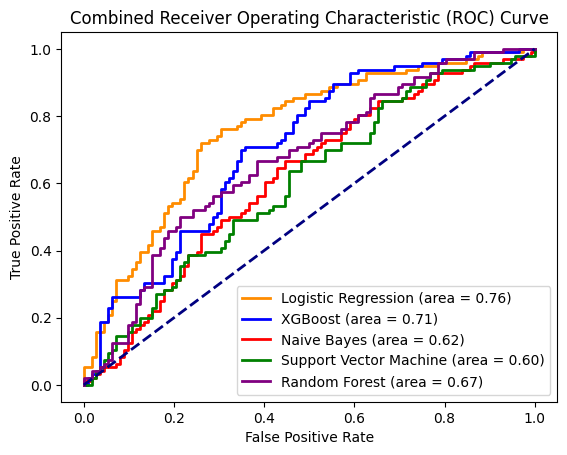

In [99]:
# comparion chart

# More visualization
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# LR:
LR_y_scores=LR_pipeline.predict_proba(X_test)[:, 1]
fpr_LR, tpr_LR, thresholds = roc_curve(y_test, LR_y_scores)
roc_auc_LR = auc(fpr_LR, tpr_LR)

# XGBOOST
xgb_y_scores = XGB_pipeline.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_y_scores)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# NB
NB_y_scores = NB_pipeline.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, NB_y_scores)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# SVM
SVM_y_scores = SVM_pipeline.predict_proba(X_test)[:, 1]
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_test, SVM_y_scores)
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)

# RF
RF_y_scores = RF_pipeline.predict_proba(X_test)[:, 1]
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, RF_y_scores)
roc_auc_RF = auc(fpr_RF, tpr_RF)

plt.figure()
plt.plot(fpr_LR, tpr_LR, color='darkorange', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_LR) # LR
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label='XGBoost (area = %0.2f)' % roc_auc_xgb) # xgb
plt.plot(fpr_nb, tpr_nb, color='red', lw=2, label='Naive Bayes (area = %0.2f)' % roc_auc_nb) # NB
plt.plot(fpr_SVM, tpr_SVM, color='green', lw=2, label='Support Vector Machine (area = %0.2f)' % roc_auc_SVM) # SVM
plt.plot(fpr_RF, tpr_RF, color='purple', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_RF) # RF
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig("Combined_roc_curve.png")

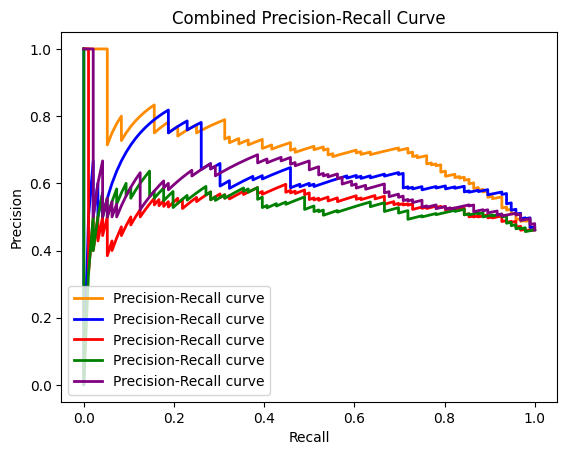

In [101]:
# 7.5 Precision-Recall Curve (Keep it for now, can be deleted)
precision_LR, recall_LR, thresholds_LR = precision_recall_curve(y_test, LR_y_scores) # LR
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_test, xgb_y_scores) # XGB
precision_nb, recall_nb, thresholds_nb = precision_recall_curve(y_test, NB_y_scores) # NB
precision_SVM, recall_SVM, thresholds_SVM = precision_recall_curve(y_test, SVM_y_scores) # SVM
precision_RF, recall_RF, thresholds_RF = precision_recall_curve(y_test, RF_y_scores) # RF

plt.figure()
plt.plot(recall_LR, precision_LR, color='darkorange', lw=2, label='Precision-Recall curve') # LR
plt.plot(recall_xgb, precision_xgb, color='blue', lw=2, label='Precision-Recall curve') # XGB
plt.plot(recall_nb, precision_nb, color='red', lw=2, label='Precision-Recall curve') # NB
plt.plot(recall_SVM, precision_SVM, color='green', lw=2, label='Precision-Recall curve') # SVM
plt.plot(recall_RF, precision_RF, color='purple', lw=2, label='Precision-Recall curve') # RF
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Combined Precision-Recall Curve')
plt.legend(loc="lower left")
plt.savefig("Combined_precision_recall_curve.png")
plt.show()


# SPLIT 2

In [ ]:
# XGBoost

# (1.5 mins)

# data splitting + test
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

prototype_XGB = XGBClassifier(random_state=42)
prototype_XGB.fit(X_train, y_train)

# Predict on the test set
prototype_XGB_pred = prototype_XGB.predict(X_test)

# Evaluate the model
prototype_accuracy_XGB = accuracy_score(y_test, prototype_XGB_pred)
print("Training (Pre-tuned) Accuracy with prototype_XGB: {}".format(prototype_accuracy_XGB))

In [ ]:
# Make predictions on y using training data's x
# xgb_train_pred = xgb.predict(X_test)

# Measure the importance of each features to further improve the model
prototype_XGB_feature_imp = pd.Series(prototype_XGB.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot the features' importance using a barplot
sns.barplot(x=prototype_XGB_feature_imp.head(10), y=prototype_XGB_feature_imp.head(10).index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for prototype_XGBoost")
plt.tight_layout()

# plt.savefig("XGBoost_feature_importance.png")
plt.show()

In [ ]:
# (Roughly 2 hours)

# We will also use a pipeline here to select the most important features and perform classification using Random Forest
prototype_XGB_pipeline = Pipeline([
    ('feature_selection', SelectFromModel(XGBClassifier(random_state=42))),
    ('classifier', prototype_XGB)
])
 
# Define param grid
# Used to include more parameter values but it took so long (> 1 hour)
# Now using only a few more common parameter values for Grid Search

# need to reduce next time
prototype_XGB_pipeline_param_grid = {
    'feature_selection__estimator__max_depth': [1, 3],
    # 'feature_selection__threshold': ['mean', 'median'],
    'classifier__learning_rate': [1, 0.1, 0.01],
    'classifier__gamma': [0, 0.1, 0.001],
    'classifier__min_child_weight': [1, 5, 10],

    # 'classifier__n_estimators': [50, 100],
    # 'classifier__max_depth': [6, 9],
    # 'classifier__subsample': [0.8, 1.0],
    # 'classifier__colsample_bytree': [0.8, 1.0],
    # 'classifier__reg_lambda': [0, 0.1]
}

prototype_XGB_pipeline.fit(X_val,y_val)

# Get the feature importance scores
prototype_feature_importances = prototype_XGB_pipeline.named_steps['feature_selection'].estimator_.feature_importances_

# Map the feature importance scores to their corresponding feature names
prototype_XGB_feature_importance_map = dict(zip(X_val.columns, feature_importances))

# Sort the features by their importance scores and select the top 10 features
prototype_top_10_features = sorted(prototype_XGB_feature_importance_map.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 features
print("Top 10 Selected Features For XGBoost:")
for feature, importance in prototype_top_10_features:
    print(f"{feature}: {importance}")

# Perform Grid Search CV with cv=5
prototype_XGB_grid_search = GridSearchCV(prototype_XGB_pipeline, prototype_XGB_pipeline_param_grid, cv=5, n_jobs=-1)

# Fit the model with grid search

# LR_grid_search.fit(X_val, y_val)
prototype_XGB_grid_search.fit(X_val, y_val)

In [ ]:
# import joblib

# # Save the trained model
# joblib.dump(XGB_grid_search.best_estimator_, 'xgboost_model.pkl')
# joblib.dump(XGB_grid_search.best_params_, 'xgboost_best_params.joblib')

# # Load the saved model
# #loaded_model = joblib.load('xgboost_model.pkl')
# #loaded_best_params = joblib.load('xgboost_best_params.joblib')

# End of SPLIT 2

In [45]:
# MLP (12 mins)

# MLPClassifier
from sklearn.neural_network import MLPClassifier

# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import numpy as np

# Instantiate MLPClassifier
MLP = MLPClassifier(random_state=42)

# Fit MLPClassifier
MLP.fit(X_train, y_train)

# Predict on the test set
MLP_pred = MLP.predict(X_test)

# Evaluate the model
accuracy_MLP = accuracy_score(y_test, MLP_pred)
print("Training (Pre-tuned) Accuracy with MLP: {}".format(accuracy_MLP))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training (Pre-tuned) Accuracy with MLP: 0.5625


In [47]:
# (70 mins)

# Pipeline with feature selection and MLPClassifier
MLP_pipeline = Pipeline([
    # ('feature_selection', SelectFromModel(MLPClassifier(random_state=42))),
    ('classifier', MLP)
])

# Define parameter grid for MLPClassifier
MLP_pipeline_param_grid = {
    # 'feature_selection__estimator__alpha': [0.0001, 0.001, 0.01],
    'classifier__hidden_layer_sizes': [(100,), (50, 50), (25, 25, 25)],
    'classifier__activation': ['relu', 'logistic', 'tanh'],
    'classifier__solver': ['adam', 'sgd'],
    'classifier__learning_rate': ['constant', 'adaptive']
}

# Fit MLPClassifier with pipeline
MLP_pipeline.fit(X_val, y_val)

# Get the feature importance scores
# feature_importances = MLP_pipeline.named_steps['feature_selection'].estimator_.coefs_[0]

# # Map the feature importance scores to their corresponding feature names
# feature_importance_map = dict(zip(X_val.columns, np.mean(np.abs(feature_importances), axis=1)))

# # Sort the features by their importance scores and select the top 10 features
# top_10_features = sorted(feature_importance_map.items(), key=lambda x: x[1], reverse=True)[:10]

# # Print the top 10 features
# print("Top 10 Selected Features For MLP:")
# for feature, importance in top_10_features:
#     print(f"{feature}: {importance}")

# Perform Grid Search CV with cv=5
MLP_grid_search = GridSearchCV(MLP_pipeline, MLP_pipeline_param_grid, cv=5, n_jobs=-1)

# Fit the model with grid search
MLP_grid_search.fit(X_val, y_val)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        MLPClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__activation': ['relu', 'logistic', 'tanh'],
                         'classifier__hidden_layer_sizes': [(100,), (50, 50),
                                                            (25, 25, 25)],
                         'classifier__learning_rate': ['constant', 'adaptive'],
                         'classifier__solver': ['adam', 'sgd']})

In [48]:
import joblib

# Save the trained model
joblib.dump(MLP_grid_search.best_estimator_, 'MLP_model.pkl')
joblib.dump(MLP_grid_search.best_params_, 'MLP_best_params.joblib')



['MLP_best_params.joblib']

In [49]:
# Display the best hyperparameter combination from Grid Search
MLP_best_params = MLP_grid_search.best_params_
print("The best hyperparameter combination is: ", MLP_best_params)

# Refit the MLPClassifier with the best hyperparameters
MLP_pipeline.set_params(**MLP_best_params)
MLP_pipeline.fit(X_train, y_train)

# Make predictions using the MLPClassifier
MLP_y_pred = MLP_pipeline.predict(X_test)

# Calculate the accuracy
MLP_pipeline_accuracy = MLP_pipeline.score(X_test, y_test)
print("Tuned Accuracy using Pipeline (MLP): {}".format(MLP_pipeline_accuracy))

The best hyperparameter combination is:  {'classifier__activation': 'logistic', 'classifier__hidden_layer_sizes': (50, 50), 'classifier__learning_rate': 'constant', 'classifier__solver': 'adam'}
Tuned Accuracy using Pipeline (MLP): 0.5673076923076923


In [50]:
# Accuracy comparison
print("For MLP:")
print("\nBefore hyperparameter tuning:")
print("Training (Pre-tuned) Accuracy: \t\t\t\t{0}% \t({1})".format(accuracy_score(y_test, MLP_pred)*100, accuracy_score(y_test, MLP_pred)))
print("\nAfter hyperparameter tuning:")
print("Testing (Post-tuned) Accuracy from automated tuning: \t{0}% \t({1})".format(MLP_pipeline_accuracy*100, MLP_pipeline_accuracy))

print("---------------------------------------")
print("Training Accuracy: \t{0}% \t({1})".format(MLP_pipeline.score(X_train, y_train)*100, MLP_pipeline.score(X_train, y_train)))
print("Test Accuracy: \t{0}% \t({1})".format(MLP_pipeline.score(X_test, y_test)*100, MLP_pipeline.score(X_test, y_test)))

For MLP:

Before hyperparameter tuning:
Training (Pre-tuned) Accuracy: 				56.25% 	(0.5625)

After hyperparameter tuning:
Testing (Post-tuned) Accuracy from automated tuning: 	56.730769230769226% 	(0.5673076923076923)
---------------------------------------
Training Accuracy: 	98.97836538461539% 	(0.9897836538461539)
Test Accuracy: 	56.730769230769226% 	(0.5673076923076923)


In [ ]:
# different models M

# XGBoost

# BERT/ GPT (transformer based)

# DL (optional: too much resources)